# STAT 207: Newton's Method

- Newton’s method is better known and more widely applied than EM and MM.

- Focus on the multidimensional version of Newton’s method.

- The core idea: locally approximate the objective function by a strictly convex quadratic function


## Notations

Consider the problem of maximizing the log-likelihood function $L(\theta), \theta \in \Theta \subset R^p$

- Gradient (or Score) of $L$:

$$
\nabla\mathcal{L}(\theta) = \begin{pmatrix}
\frac{\partial\mathcal{L}(\theta)}{\partial\theta_1} \\
\vdots \\
\frac{\partial\mathcal{L}(\theta)}{\partial\theta_p}
\end{pmatrix}
$$

- Hessian of $L$:
$$
\nabla^2\mathcal{L}(\theta) = \begin{pmatrix}
\frac{\partial^2\mathcal{L}(\theta)}{\partial\theta_1^2} & \cdots & \frac{\partial^2\mathcal{L}(\theta)}{\partial\theta_1\partial\theta_p} \\
\vdots & \ddots & \vdots \\
\frac{\partial^2\mathcal{L}(\theta)}{\partial\theta_p\partial\theta_1} & \cdots & \frac{\partial^2\mathcal{L}(\theta)}{\partial\theta_p^2}
\end{pmatrix}
$$

- Observed information matrix (negative Hessian): 
$$
-\nabla^2\mathcal{L}(\theta)
$$

- Expected (Fisher) information matrix:
$$
\mathbb{E}[-\nabla^2\mathcal{L}(\theta)]
$$

## Newton's Method

- Newton's method was originally developed for finding roots of nonlinear equations $f(x) = 0$ (NAS Chapter 5)

- It is considered the gold standard for its fast (quadratic) convergence:
$$
\frac{\|\theta^{(t+1)} - \theta^*\|}{\|\theta^{(t)} - \theta^*\|^2} \to \text{constant}.
$$

- Taylor expansion around the current iterate $\theta^{(t)}$:
$$
L(\theta) \approx L(\theta^{(t)}) + \nabla L(\theta^{(t)})^\top (\theta - \theta^{(t)}) + \frac{1}{2}(\theta - \theta^{(t)})^\top \nabla^2 L(\theta^{(t)}) (\theta - \theta^{(t)}) 
$$

- To maximize the quadratic function, we equate its gradient to zero
$$
\nabla L(\theta^{(t)}) + \nabla^2 L(\theta^{(t)}) (\theta - \theta^{(t)}) = \mathbf{0}_p
$$
    and the next iterate being
    $$
    \begin{aligned}
    \theta^{(t+1)} =& \theta^{(t)} - \left[ \nabla^2 L(\theta^{(t)})\right]^{-1}\nabla L(\theta^{(t)}) \\
    =& \theta^{(t)} +  \left[ -\nabla^2 L(\theta^{(t)})\right]^{-1}\nabla L(\theta^{(t)}) 
    \end{aligned}
    $$
    We call this the **naive Newton's method**.

- Any stationary point of $L(\theta)$ is a fixed point of Newton’s method.


**Two potential problems**

- Computationally expensive to evaluate and invert the observed information

- Newton’s method is not an ascent algorithm in the sense that $L(\theta^{(t+1)}) > L(\theta^{(t)})$.

**Solution**

- Approximate  $-\nabla^2 L(\theta^{(t)})$  by a positive definite $A$, 

- Line search.


To maximize a loglikelihood $L(\theta)$, by first-order Taylor expansion,

$$
\begin{aligned}
& L(\theta^{(t)} + s \Delta\theta^{(t)}) - L(\theta^{(t)})\\
= &  s \cdot \nabla L(\theta^{(t)})^T \Delta\theta^{(t)} + o(s)\\
= & s \cdot \nabla L(\theta^{(t)})^T [A^{(t)}]^{-1} \nabla L(\theta^{(t)}) + o(s),
\end{aligned}
$$
For $s$ sufficiently small, the RHS is strictly positive for PD $A^{(t)}$. The quantity $\nabla L(\theta^{(t)})^T[A^{(t)}]^{-1} \nabla L(\theta^{(t)})$ is termed the **Newton decrement**.

- A **practical** Newton-type algorithm iterates according to
$$
\theta^{(t+1)} = \theta^{(t)} + s[A^{(t)}]^{-1} \nabla L(\theta^{(t)}) = \theta^{(t)} + s\Delta\theta^{(t)},
$$
where $A^{(t)}$ is a PD approximation to $-\nabla^2 L(\theta^{(t)})$ and $s$ is the step length.

- If $L$ is strictly concave, $-\nabla^2 L(\theta^{(t)})$ is PD.

- Line search strategy: step-halving (backtracking $s=1,1/2,..$), golden section search, cubic interpolation, Wolfe conditions (Armijo rule), ... Note the **Newton direction**
$$
\Delta\theta^{(t)} = [A^{(t)}]^{-1} \nabla L(\theta^{(t)})
$$
is calculated only once in each iteration. The cost of choosing $s$ is minimal.

    - The choice of line search strategy depends on the specific optimization problem and the desired trade-off between computational efficiency and convergence properties. 
    
    - Different strategies may be more suitable for different scenarios, and the performance of the line search can significantly impact the efficiency and reliability of Newton's method.

- How to approximate $-\nabla^2 L(\theta^{(t)})$? Often requires problem specific analysis.

- Taking $A = I$ leads to **steepest ascent**, also known as **gradient ascent**.


<div>
<img src="gd.jpg" alt="Gradient Ascent" style="width: 500px;"/>
</div>

\begin{center}
\includegraphics[width=0.8\textwidth]{gd.jpg}
\end{center}

## Fisher's scoring method

- Replace $-\nabla^2 L(\theta)$ by the expected Fisher information
$$
\mathbf{F}(\theta) = \mathbf{E}[-\nabla^2 L(\theta)] = \mathbf{E}[\nabla L(\theta) \nabla L(\theta)^T]\succeq \mathbf{0}_{p\times p},
$$
which is PSD under the exchangeability of expectation and differentiation.

- Fisher's scoring algorithm iterates according to
$$
\theta^{(t+1)} = \theta^{(t)} + s[\mathbf{F}(\theta)]^{-1} \nabla L(\theta^{(t)}) 
$$

## Nonlinear least squares - Gauss-Newton method (NAS 14.4-14.6)

- The problem Gauss faced in 1800s: Relocate Ceres by fitting 41 observations to a 6-parameter (nonlinear) orbit. [ref1](https://math.berkeley.edu/~mgu/MA221/Ceres_Presentation.pdf) [ref2](https://sites.math.rutgers.edu/~cherlin/History/Papers1999/weiss.html)

- Nonlinear least squares (curve fitting):
$$
\min f(\beta) = \frac{1}{2}\sum_{i=1}^{n}\left(y_i - \mu_i(x_i, \beta) \right)^2.
$$

- *Score* and *information matrices* can be expressed as:

$$
\begin{aligned}
\nabla f(\beta) =&  -\sum_{i=1}^{n} [\mathbf{y}_i - \boldsymbol{\mu}_i(\beta)] \nabla \boldsymbol{\mu}_i(\beta) \\
\nabla^2 f(\beta) =& \sum_{i=1}^{n} \nabla \boldsymbol{\mu}_i(\beta) \nabla \boldsymbol{\mu}_i(\beta)^T  -\sum_{i=1}^{n} [\mathbf{y}_i - \boldsymbol{\mu}_i(\beta)] \nabla^2 \boldsymbol{\mu}_i(\beta)\\
\mathbf{F}(\beta) =& \sum_{i=1}^{n} \nabla \boldsymbol{\mu}_i(\beta) \nabla \boldsymbol{\mu}_i(\beta)^T = \mathbf{J}(\beta)^T\mathbf{J}(\beta),
\end{aligned}
$$
where $\mathbf{J}(\beta)^T = [\nabla \boldsymbol{\mu}_1(\beta),\ldots,\nabla \boldsymbol{\mu}_n(\beta)] \in \mathbb{R}^{p \times n}$.

- Gauss-Newton method:
$$
\beta^{(t+1)} = \beta^{(t)} + s[\mathbf{F}(\beta^{(t)})]^{-1} \nabla L(\beta^{(t)}) 
$$

- **Levenberg-Marquardt method**, or the damped least squares algorithm (DLS), adds a ridge term to the approximated Hessian
$$
\beta^{(t+1)} = \beta^{(t)} + s[\mathbf{F}(\beta^{(t)}) + \tau \mathbf{I}_p]^{-1} \nabla L(\beta^{(t)}) 
$$


## Generalized linear models (GLMs)

- A concrete example: logistic regression.

- The goal is to predict whether a credit card transaction is fraud ($y_i = 1$) or not ($y_i = 0$). Predictors ($x_i$) include: time of transaction, last location, merchant, ...

- Model $y_i \sim \text{Bernoulli}(p_i)$, with density
$$
f(y_i|p_i) = p_i^{y_i} (1-p_i)^{1 - y_i}
$$
and 
\begin{gather*}
\mathbf{E}(y_i) = p_i = \frac{e^\eta_i}{1 + e^\eta_i}  \\
\eta_i = x_i^T\beta = \ln \left( \frac{p_i}{1 - p_i} \right)
\end{gather*}

- Given data $(y_i,x_i), i=1,..,n$,
$$
\begin{aligned}
L_n(\beta) =& \\
\nabla L_n(\beta) =& \\
-\nabla^2 L_n(\beta) =& \\
\mathbf{F}_n(\beta) =&
\end{aligned}
$$

- Newton's method is the same as Fisher's scoring:
$$
\beta^{(t+1)} = 
$$
and the working responses are
$$
z^{(t)} = 
$$

- One Newton's iteration is equivalent to solving a weighed least squares problem, **IRWLS (iteratively re-weighted least squares)**.

### GLM

- The exponential family with density 
$$
p(y|\theta,\phi) = \exp\left\{ \frac{y\theta - b(\theta)}{a(\phi)} + c(y,\phi) \right\}
$$

- The score, Hessian, and information matrices are

<div>
<img src="glm_eqs.jpg" alt="GLM" style="width: 500px;"/>
</div>

\begin{center}
\includegraphics[width=1.2\textwidth]{glm_eqs.jpg}
\end{center}

- For the canonical link $\theta = \eta$, Fisher's scoring == Newton's method, it is a convex problem!

- For non-canonical links, Fisher's scoring $\ne$ Newton's method, a non-convex problem.



In [ ]:
import numpy as np
from scipy.special import expit

# Generate random data
np.random.seed(52)
n = 100
p = 3
X = np.random.randn(n, p)
true_beta = np.array([1.5, -0.5, 2.0])
eta = np.dot(X, true_beta)
probabilities = expit(eta)
y = np.random.binomial(1, probabilities)

# Initialize parameters
beta = np.zeros(p)
max_iter = 100
tolerance = 1e-6

# Fisher scoring algorithm
for _ in range(max_iter):
    eta = np.dot(X, beta)
    mu = expit(eta)
    W = np.diag(mu * (1 - mu))
    z = eta + (y - mu) / (mu * (1 - mu))
    gradient = np.dot(X.T, y - mu)
    hessian = np.dot(X.T, np.dot(W, X))
    
    # Update beta using Fisher scoring update
    beta_new = beta + np.linalg.solve(hessian, gradient)
    
    # Check convergence
    if np.linalg.norm(beta_new - beta, ord = np.inf) < tolerance:
        break
    
    beta = beta_new

print("Estimated beta:", beta)

### Python Implementations of GLM

In [29]:
import statsmodels.api as sm
import numpy as np

# Generate some random data
np.random.seed(0)
n = 100
X = np.random.randn(n, 2)
y = np.random.binomial(1, 0.5, n)

# Add constant column to X
X = sm.add_constant(X)

# Fit a logistic regression model using GLM
model = sm.GLM(y, X, family=sm.families.Binomial())
result = model.fit()

# Print the summary of the model
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -67.688
Date:                Thu, 18 May 2023   Deviance:                       135.38
Time:                        09:32:10   Pearson chi2:                     100.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02227
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1623      0.205     -0.793      0.4

In [28]:
import glmnet_python
from glmnet import glmnet

## https://glmnet-python.readthedocs.io/en/latest/glmnet_vignette.html#

/var/folders/22/nmmy2bvn43dby4g5jhlr3jzw0000gn/T/ipykernel_377/427430394.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Quasi-Newton Methods

- Quasi-Newton is one of the most successful "black-box" NLP optimizers in use. 

- There are several quasi-Newton methods implemented in various Python libraries. Here are a few commonly used ones:

    1. SciPy: The `scipy.optimize.minimize` function provides the option to use quasi-Newton methods such as BFGS (Broyden-Fletcher-Goldfarb-Shanno) and L-BFGS-B (Limited-memory BFGS with bounds constraints). [ref](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)

    2. scikit-learn: The `sklearn.linear_model.LogisticRegression` class uses the Limited-memory BFGS (L-BFGS) solver, which is a quasi-Newton method, for optimization. [ref](https://scikit-learn.org/stable/modules/linear_model.html#)

    3. statsmodels: The `statsmodels.api.GLM` class supports quasi-Newton methods like BFGS and Newton conjugate gradient (NCG) for generalized linear models.

    4. PyTorch: The `torch.optim.LBFGS` optimizer implements the L-BFGS (Limited-memory BFGS) algorithm, a quasi-Newton method, for optimization in PyTorch.
    
    5. TensorFlow: the `tfp.optimizer` module. The `tfp.optimizer.bfgs_minimize` function can be used to perform optimization using the BFGS algorithm.

- The previous Newton's update
$$
\theta^{(t+1)} = \theta^{(t)} + s[A^{(t)}]^{-1} \nabla L(\theta^{(t)}),
$$
where $A^{(t)}$ is a PD approximation of the Hessian.

    - Pros: fast convergence
    
    - Cons: compute and store the Hessian at each iteration (usually  $O(np^2)$  cost in statistical problems), solving a linear system ($O(p^3)$ cost in general), human efforts (derive and implement gradient and Hessian, pd approximation, ...)
    
- Any PD $A$ gives a ascent algorithm - tradeoff between convergence rate and cost per iteration.

- How many iterations does the Newton's method using the Hessian need for a convex quadratic $f$?

### Quasi-Newton

- Update the approximation matrix $A$ according to the **secant condition**:

$$
\nabla f(\mathbf{x}^{(t)}) - \nabla f(\mathbf{x}^{(t-1)}) \approx [\nabla^2 f(\mathbf{x}^{(t)})](\mathbf{x}^{(t)} - \mathbf{x}^{(t-1)}).
$$

- Instead of computing $A$ from scratch at each iteration, we update an approximation $A$ to $\nabla^2 f(\mathbf{x}^{(t)})$  that satisfies

    1. p.d.,
    2. the secant condition,
    3. closest to the previous approximation.
    
- Super-linear convergence, compared to the quadratic convergence of Newton's method. But each iteration only takes $O(p^2)$.


### Davidon-Fletcher-Powell (DFP) rank-2 update. 

- Solve the following minimization problem:

$$
\begin{aligned}
\min_{\mathbf{A}} & \quad \| \mathbf{A} - \mathbf{A}^{(t)} \|_F \\
\text{subject to} & \quad \mathbf{A} = \mathbf{A}^T \\
& \quad \mathbf{A}(\mathbf{x}^{(t)} - \mathbf{x}^{(t-1)}) = \nabla f(\mathbf{x}^{(t)}) - \nabla f(\mathbf{x}^{(t-1)})
\end{aligned}
$$
    to obtain the next approximation $\mathbf{A}^{(t+1)}$. 
    
    - The solution is a low rank (rank 1 or rank 2) update of  $\mathbf{A}^{(t)}$.
    
    - The inverse is low rank as well thanks to the Sherman-Morrison-Woodbury formula. 
    
    - $O(p^2)$ operations. Need to store a $p\times p$ dense matrix.
    
-  How to make sure $\mathbf{A}^{(t+1)}$ is positive definite?  
    

    
### Broyden-Fletcher-Goldfarb-Shanno (BFGS) rank 2 update 


<div>
<img src="bfgs.png" alt="BFGS" style="width: 500px;"/>
</div>

\begin{center}
\includegraphics[width=0.9\textwidth]{bfgs.png}
\end{center}

- The BFGS update  is considered by many the most effective among all quasi-Newton updates. BFGS imposes secant condition on the inverse of Hessian $H = A^{-1}$.

$$
\begin{aligned}
\min_{\mathbf{H}} & \quad \| \mathbf{H} - \mathbf{H}^{(t)} \|_F \\
\text{subject to} & \quad \mathbf{H} = \mathbf{H}^T \\
& \quad \mathbf{H} \left[ \nabla f(\mathbf{x}^{(t)}) - \nabla f(\mathbf{x}^{(t-1)}) \right] = \mathbf{x}^{(t)} - \mathbf{x}^{(t-1)}.
\end{aligned}
$$

- [Rank-two update example](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm)

- Limited-memory BFGS (L-BFGS). Only store the secant pairs. No need to store the $p\times p$  approximate inverse Hessian. Particularly useful for large scale optimization.


- How to choose the initial approximation $A^{(0)}$? Identity or Hessian (if pd) or Fisher information matrix at the starting point.



In [3]:
import numpy as np
from scipy.optimize import minimize

# Define the Rosenbrock function
def rosenbrock(x):
    return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

# Define the gradient of the Rosenbrock function
def rosenbrock_gradient(x):
    n = len(x)
    gradient = np.zeros_like(x)
    gradient[0] = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
    gradient[1:-1] = 200 * (x[1:-1] - x[:-2]**2) - 400 * x[1:-1] * (x[2:] - x[1:-1]**2) - 2 * (1 - x[1:-1])
    gradient[-1] = 200 * (x[-1] - x[-2]**2)
    return gradient

# Define the Hessian of the Rosenbrock function
def rosenbrock_hessian(x):
    n = len(x)
    hessian = np.zeros((n, n))
    hessian[0, 0] = 1200 * x[0]**2 - 400 * x[1] + 2
    hessian[0, 1] = -400 * x[0]
    hessian[1, 0] = -400 * x[0]
    for i in range(1, n - 1):
        hessian[i, i] = 202 + 1200 * x[i]**2 - 400 * x[i+1]
        hessian[i, i+1] = -400 * x[i]
        hessian[i+1, i] = -400 * x[i]
    hessian[-1, -2] = -400 * x[-2]
    hessian[-2, -1] = -400 * x[-2]
    hessian[-1, -1] = 200
    return hessian

/var/folders/22/nmmy2bvn43dby4g5jhlr3jzw0000gn/T/ipykernel_377/3868080114.py:18: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


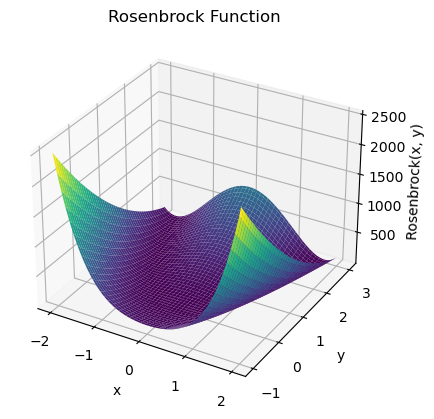

In [18]:
import warnings
warnings.filterwarnings('ignore')

# Your code generating the warning
import numpy as np
import matplotlib.pyplot as plt

# Define the Rosenbrock function
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Create a grid of x, y values
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)

# Compute the Rosenbrock function values for each point in the grid
Z = rosenbrock(X, Y)

# Plot the Rosenbrock function
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Rosenbrock(x, y)')
ax.set_title('Rosenbrock Function')
plt.show()

In [22]:
# Initial guess
x0 = np.array([1, 2, 3])

# Minimize using BFGS
bfgs_result = minimize(rosenbrock, x0, method='BFGS', jac=rosenbrock_gradient, hess=rosenbrock_hessian)

# Minimize using Gradient Descent
gd_result = minimize(rosenbrock, x0, method='CG', jac=rosenbrock_gradient)

# Print the convergence information
print("BFGS:")
print(bfgs_result)
print("\nGD:")
print(gd_result)


BFGS:
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 8.179817545802151e-14
        x: [ 1.000e+00  1.000e+00  1.000e+00]
      nit: 25
      jac: [ 2.919e-06 -6.660e-06  2.322e-06]
 hess_inv: [[ 9.273e-02  1.830e-01  3.668e-01]
            [ 1.830e-01  3.659e-01  7.336e-01]
            [ 3.668e-01  7.336e-01  1.475e+00]]
     nfev: 31
     njev: 31

GD:
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 4.942476963882118e-12
       x: [ 1.000e+00  1.000e+00  1.000e+00]
     nit: 45
     jac: [ 3.448e-07  1.027e-06  1.883e-06]
    nfev: 98
    njev: 98


/Users/feiz/miniforge3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_minimize.py:554: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,


In [ ]:
## jupyter nbconvert --TagRemovePreprocessor.remove_input_tags='{"hide_code"}' --to pdf Newton.ipynb